## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

for bs in BATCH_SIZE:
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    bs_name_tag = "batch-size-%s" % str(bs)
    results[bs_name_tag] = { 'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0719 09:24:27.593283  7816 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 09:24:27.606248  7816 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 09:24:27.609243  7816 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 09:24:27.682044  7816 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 09:24:27.871539  7816 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 359s 7ms/step - loss: 2.2252 - acc: 0.1701 - val_loss: 3.7571 - val_acc: 0.1730
Epoch 50/50
50000/50000 [==============================] - 365s 7ms/step - loss: 2.2287 - acc: 0.1707 - val_loss: 3.6783 - val_acc: 0.1855
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 46s 917us/step - loss: 2.0561 - acc: 0.2516 - val_loss: 2.1625 - val_acc: 0.2767
Epoch 2/50
50000/50000 [==============================] - 45s 909us/step - loss: 2.0252 - acc: 0.2637 - val_loss: 2.1253 - val_acc: 0.2859
Epoch 3/50
50000/50000 [==============================] - 45s 903us/step - loss: 2.0105 - acc: 0.2700 - val_loss: 2.1180 - val_acc: 0.2956
Epoch 4/50
50000/50000 [==============================] - 46s 911us/step - loss: 1.9987 - acc: 0.2723 - val_loss: 2.1078 - val_acc: 0.2953
Epoch 5/50
50000/50000 [==============================] - 46s 912us/step - loss: 1.9856 - acc: 0.2767 - val_loss: 2.1222 - val_a

50000/50000 [==============================] - 31s 624us/step - loss: 1.7394 - acc: 0.3752 - val_loss: 1.7789 - val_acc: 0.3933
Epoch 8/50
50000/50000 [==============================] - 30s 594us/step - loss: 1.7369 - acc: 0.3773 - val_loss: 1.7916 - val_acc: 0.3909
Epoch 9/50
50000/50000 [==============================] - 29s 577us/step - loss: 1.7364 - acc: 0.3747 - val_loss: 1.7868 - val_acc: 0.3945
Epoch 10/50
50000/50000 [==============================] - 29s 580us/step - loss: 1.7298 - acc: 0.3778 - val_loss: 1.8074 - val_acc: 0.3897
Epoch 11/50
50000/50000 [==============================] - 29s 572us/step - loss: 1.7285 - acc: 0.3777 - val_loss: 1.7927 - val_acc: 0.3970
Epoch 12/50
50000/50000 [==============================] - 29s 576us/step - loss: 1.7261 - acc: 0.3804 - val_loss: 1.7692 - val_acc: 0.3945
Epoch 13/50
50000/50000 [==============================] - 29s 576us/step - loss: 1.7258 - acc: 0.3800 - val_loss: 1.7796 - val_acc: 0.3991
Epoch 14/50
50000/50000 [=========

50000/50000 [==============================] - 10s 192us/step - loss: 1.6020 - acc: 0.4254 - val_loss: 1.6534 - val_acc: 0.4260
Epoch 16/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6016 - acc: 0.4260 - val_loss: 1.6510 - val_acc: 0.4232
Epoch 17/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.6027 - acc: 0.4263 - val_loss: 1.6554 - val_acc: 0.4253
Epoch 18/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6010 - acc: 0.4263 - val_loss: 1.6520 - val_acc: 0.4268
Epoch 19/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.6012 - acc: 0.4255 - val_loss: 1.6532 - val_acc: 0.4272
Epoch 20/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.6005 - acc: 0.4263 - val_loss: 1.6448 - val_acc: 0.4279
Epoch 21/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.5997 - acc: 0.4279 - val_loss: 1.6458 - val_acc: 0.4265
Epoch 22/50
50000/50000 [=========

50000/50000 [==============================] - 6s 118us/step - loss: 1.5663 - acc: 0.4400 - val_loss: 1.6213 - val_acc: 0.4317
Epoch 24/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5673 - acc: 0.4379 - val_loss: 1.6181 - val_acc: 0.4311
Epoch 25/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5666 - acc: 0.4387 - val_loss: 1.6194 - val_acc: 0.4314
Epoch 26/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5662 - acc: 0.4402 - val_loss: 1.6200 - val_acc: 0.4332
Epoch 27/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5668 - acc: 0.4366 - val_loss: 1.6223 - val_acc: 0.4326
Epoch 28/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5677 - acc: 0.4386 - val_loss: 1.6171 - val_acc: 0.4353
Epoch 29/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5668 - acc: 0.4378 - val_loss: 1.6172 - val_acc: 0.4325
Epoch 30/50
50000/50000 [==============

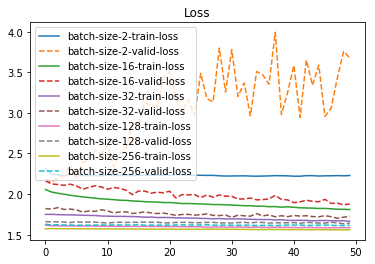

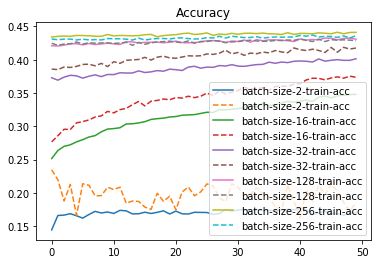

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond + '-train-loss')
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--',label=cond + '-valid-loss')
plt.title("Loss") 
plt.legend()
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-',  label=cond + '-train-acc')
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond + '-train-acc')
plt.title("Accuracy") 
plt.legend()
plt.show() 

for Activation

In [23]:
"""
建立神經網路，並加入 BN layer
"""
def build_mlp1(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0: 
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    bn = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(bn)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [24]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 128
MOMENTUM = 0.95

In [25]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
keras.backend.clear_session() # 把舊的 Graph 清掉
print("Experiment with LR = %.6f" % (LEARNING_RATE))
model = build_mlp1(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

exp_name_tag = "exp-lr-%s" % str(LEARNING_RATE)
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,739,402
Trainable params: 1,739,146
Non-trainable params: 256
__________________________________

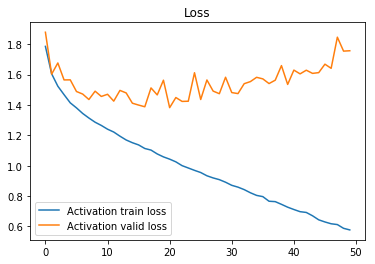

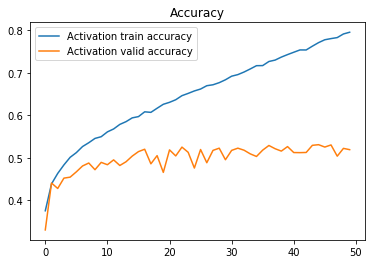

In [26]:
"""Code Here
將結果繪出
""" 
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], label="Activation train loss")
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], label="Activation valid loss")
plt.title("Loss") 
plt.legend()
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], label="Activation train accuracy")
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], label="Activation valid accuracy")
plt.title("Accuracy") 
plt.legend()
plt.show() 

for After input

In [27]:
"""
建立神經網路，並加入 BN layer
"""
def build_mlp2(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    bn = BatchNormalization()(input_layer)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(bn)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [28]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
keras.backend.clear_session() # 把舊的 Graph 清掉
print("Experiment with LR = %.6f" % (LEARNING_RATE))
model = build_mlp2(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

exp_name_tag = "exp-lr-%s" % str(LEARNING_RATE)
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
________________________________

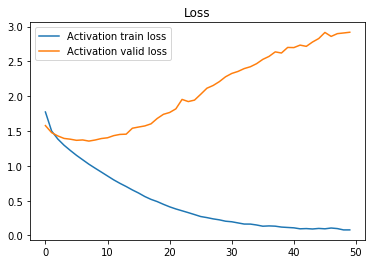

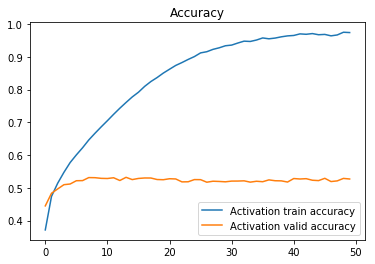

In [29]:
"""Code Here
將結果繪出
""" 
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], label="Activation train loss")
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], label="Activation valid loss")
plt.title("Loss") 
plt.legend()
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], label="Activation train accuracy")
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], label="Activation valid accuracy")
plt.title("Accuracy") 
plt.legend()
plt.show() 